<a href="https://colab.research.google.com/github/LungsAstro/MLproject/blob/main/ALICE_ML_with_HF_and_mb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installing the important libraries, modules

In [39]:
pip install matplotlib pandas numpy uproot3 awkward scikit-learn shap keras


In [40]:
pip install tensorflow


In [41]:
pip install --upgrade tensorflow keras


IMPORTING ALL THE NECESSARY LIBRARIES FOR THE ML


In [42]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import uproot3
import awkward as ak
import sklearn
from sklearn.utils import shuffle
from matplotlib.lines import Line2D
import math
import shap

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.optimizers import Adam
from keras.optimizers import SGD

#from keras.wrappers.scikit_learn import KerasClassifier


#from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder

In [43]:
from sklearn.pipeline import Pipeline
from itertools import chain
import tensorflow as tf
from keras import optimizers, initializers

from sklearn.utils import shuffle

import itertools
from sklearn import datasets
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.model_selection import train_test_split

Loading and preparing data

In [44]:
import pandas as pd

# Read the datasets into DataFrames
#data1 = pd.read_csv('muontracks_HF.txt', delimiter='\t')  # Adjust delimiter as needed
#data2 = pd.read_csv('muontracks_mb.txt', delimiter='\t')  # Adjust delimiter as needed

data1 = pd.read_csv('/content/muontracks_HF.txt', delimiter='\t')
data2 = pd.read_csv('/content/muontracks_mb.txt', delimiter='\t')

# Display the first few rows of the DataFrames
print(data1.head())
print(data2.head())


  ID,eta,pt,p,phi,motherPDG,nClusters,pDca,chi2,chi2MatchMCHMID,chi2MatchMCHMFT
0  3073,-2.55397,0.860595,5.56625,-0.40483,411,10...                           
1  21891,-2.53068,0.938266,5.93061,2.67323,-411,1...                           
2  89317,-3.06247,0.493791,5.29025,1.03232,-211,1...                           
3  91333,-3.19394,0.343451,4.19445,-3.11416,411,1...                           
4  101594,-2.82832,0.413028,3.50582,-1.11936,15,1...                           
  ID,eta,pt,p,phi,motherPDG,nClusters,pDca,chi2,chi2MatchMCHMID,chi2MatchMCHMFT
0  30383,13.7452,0.00435167,2028.02,-34.8926,211,...                           
1  57089,3.13021,1.31991,15.1277,2.59822,-321,10,...                           
2  124301,-2.11891,1.23244,5.20225,-3.04924,-321,...                           
3  172327,-2.99416,0.429891,4.30291,-2.58319,211,...                           
4  247929,-2.77647,0.526986,4.2487,-0.495488,321,...                           


In [45]:
df1 = pd.read_csv('muontracks_HF.txt')
df2 = pd.read_csv('muontracks_mb.txt')

In [46]:
df2

,ID,eta,pt,p,phi,motherPDG,nClusters,pDca,chi2,chi2MatchMCHMID,chi2MatchMCHMFT
0,30383,13.74520,0.004352,2028.02000,-34.892600,211,10,176.2950,2.411720e+07,-1,35.50000
1,57089,3.13021,1.319910,15.12770,2.598220,-321,10,101.6090,1.417220e+06,-1,79.00000
2,124301,-2.11891,1.232440,5.20225,-3.049240,-321,10,29.6977,1.466370e+06,-1,60.25000
3,172327,-2.99416,0.429891,4.30291,-2.583190,211,11,74.2861,1.096000e+03,-1,17.37500
4,247929,-2.77647,0.526986,4.24870,-0.495488,321,10,57.7322,9.050000e+01,-1,29.87500
5,162752,-3.10767,1.940770,21.74980,2.490900,-421,11,14.9575,1.762500e+01,-1,2.92188
6,262366,2.80295,0.257610,2.13222,-2.437190,211,10,63.9341,6.021120e+05,-1,25.25000
7,403420,-3.60972,0.649180,12.00430,-1.514810,-211,10,108.5730,1.280000e+02,-1,13.43750
8,472095,-3.12547,0.854223,9.74430,0.424637,321,11,89.6324,1.250000e+01,-1,9.43750


In [47]:
df1

,ID,eta,pt,p,phi,motherPDG,nClusters,pDca,chi2,chi2MatchMCHMID,chi2MatchMCHMFT
0,3073,-2.55397,0.860595,5.56625,-0.404830,411,10,55.6965,108.000000,-1.000000,8.000
1,21891,-2.53068,0.938266,5.93061,2.673230,-411,10,339.6240,0.151367,0.263672,-1.000
2,89317,-3.06247,0.493791,5.29025,1.032320,-211,10,51.3547,3.843750,-1.000000,4.625
3,91333,-3.19394,0.343451,4.19445,-3.114160,411,10,42.8555,0.180664,0.605469,-1.000
4,101594,-2.82832,0.413028,3.50582,-1.119360,15,10,104.0820,0.190430,1.585940,-1.000
5,124076,-3.48873,0.281048,4.60568,-2.645020,421,11,42.9393,0.087891,1.351560,-1.000
6,141236,-3.00753,0.931121,9.44475,-2.433890,-411,9,313.7120,0.165039,0.192383,-1.000
7,155831,-3.32923,0.694767,9.71025,-2.349290,411,10,57.4067,0.047852,0.234375,-1.000
8,187634,-3.43737,1.091470,16.99250,1.811830,-421,10,47.8398,0.079102,0.945312,-1.000
9,191029,-3.16949,0.320978,3.82565,0.846115,-411,10,22.5387,0.127930,0.835938,-1.000


In [48]:
# Load the data from the text files
df_hf = pd.read_csv('muontracks_HF.txt')
df_mb = pd.read_csv('muontracks_mb.txt')

# Add column names since they were provided in your description
columns = ['ID', 'eta', 'pt', 'p', 'phi', 'motherPDG', 'nClusters', 'pDca', 'chi2', 'chi2MatchMCHMID', 'chi2MatchMCHMFT']
df_hf.columns = columns
df_mb.columns = columns

# Define PDG codes for heavy flavor (HF) decays
signal_pdg_codes = [411, -411, 421, -421, 521, -521]  #Need to consider all the sgn PDG codes

# Label data: 1 for signal (HF), 0 for background
df_hf['label'] = df_hf['motherPDG'].apply(lambda x: 1 if x in signal_pdg_codes else 0)
df_mb['label'] = df_mb['motherPDG'].apply(lambda x: 1 if x in signal_pdg_codes else 0)

# Combine the datasets
data = pd.concat([df_hf, df_mb], ignore_index=True)
data = shuffle(data)

# Prepare the features and labels for training
features = ['eta', 'pt', 'p', 'phi', 'nClusters', 'pDca', 'chi2', 'chi2MatchMCHMID', 'chi2MatchMCHMFT']
X = data[features].astype(float)
Y = data['label']


Split Data into Training and Test Sets

In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)


Build and Train the Neural Network Model

In [50]:
# Initialize weight initializers
initializer = tf.keras.initializers.RandomNormal()
initializer4 = tf.keras.initializers.HeNormal()

# Define the model
model = Sequential()
model.add(Dense(20, activation='relu', input_dim=len(features), kernel_initializer=initializer4))
model.add(Dense(35, kernel_initializer=initializer, activation='relu'))
model.add(Dense(49, kernel_initializer=initializer, activation='relu'))
model.add(Dense(28, kernel_initializer=initializer, activation='relu'))
model.add(Dense(13, kernel_initializer=initializer, activation='relu'))
model.add(Dense(10, kernel_initializer=initializer, activation='relu'))
model.add(Dense(1, kernel_initializer=initializer, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.01), metrics=['accuracy'])

# Train the model
history = model.fit(X_train, Y_train, epochs=50, batch_size=32, verbose=1, validation_split=0.3, shuffle=True)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 0.6667 - loss: 0.5778 - val_accuracy: 0.6667 - val_loss: 0.5633
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - accuracy: 0.6667 - loss: 0.5835 - val_accuracy: 0.6667 - val_loss: 0.5742
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.6667 - loss: 0.5760 - val_accuracy: 0.5000 - val_loss: 5.7608
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step - accuracy: 0.5000 - loss: 47.4053 - val_accuracy: 0.6667 - val_loss: 0.5738
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step - accuracy: 0.6667 - loss: 0.5748 - val_accuracy: 0.6667 - val_loss: 0.5717
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step - accuracy: 0.6667 - loss: 0.5739 - val_accuracy: 0.6667 - val_loss: 0.5746
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - accuracy: 0.6667 - loss: 0.5737 - val_accuracy: 0.6667 - val_loss: 0.5685
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step - accuracy: 0.6667 - loss: 0.5734 - val_accuracy: 0.6667 - val_loss: 0

Plot Training and Validation Loss & Accuracy

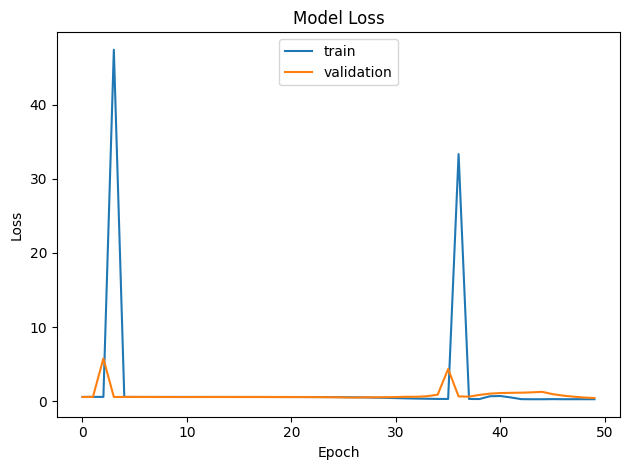

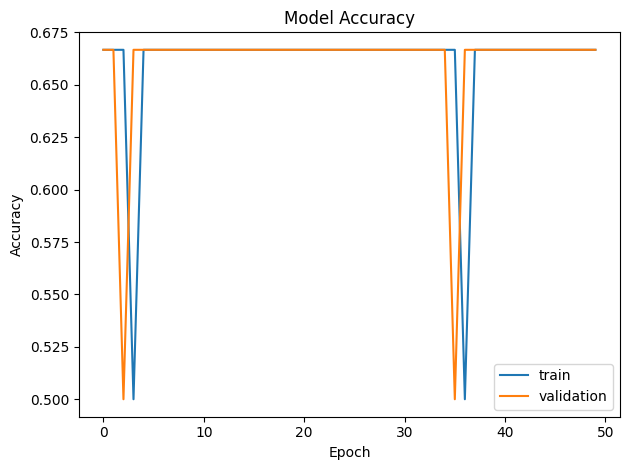

In [51]:
# Plot the training and validation loss
plt.plot(history.history['loss'], "-")
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper center')
plt.tight_layout()
plt.show()

# Plot the training and validation accuracy
plt.grid(False)
plt.plot(history.history['accuracy'], "-")
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='best')
plt.tight_layout()
plt.show()


Model Evaluation

In [52]:
# Predict on training data
pred_train = model.predict(X_train).flatten()
# Evaluate the model on the training data
scores_train = model.evaluate(X_train, Y_train, verbose=0)
print(f'Accuracy on training data: {scores_train[1]*100:.2f}% \nError on training data: {(1 - scores_train[1])*100:.2f}%')

# Predict on test data
pred_test = model.predict(X_test).flatten()
# Evaluate the model on the test data
scores_test = model.evaluate(X_test, Y_test, verbose=0)
print(f'Accuracy on test data: {scores_test[1]*100:.2f}% \nError on test data: {(1 - scores_test[1])*100:.2f}%')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
Accuracy on training data: 66.67% 
Error on training data: 33.33%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
Accuracy on test data: 25.00% 
Error on test data: 75.00%


Definining a Function to Retrieve Model Results

In [53]:
# def function1(label, probs):
#     sig = []
#     backG = []
#     for i in range(len(probs)):
#         if label[i][1] == 1:
#             sig.append(probs[i])
#         elif label[i][1] == 0:
#             backG.append(probs[i])
#     return sig, backG
# print(Y_train)
# sig_training, back_training = function1(Y_train, pred_train)
# sig_testing, back_testing = function1(Y_test, pred_test)

def function1(label, probs):
    sig = []
    backG = []
    for i in range(len(probs)):
        # Access elements of a Pandas Series directly using single index
        if label.iloc[i] == 1:  # Use .iloc for integer-location based indexing
            sig.append(probs[i])
        elif label.iloc[i] == 0:
            backG.append(probs[i])
    return sig, backG
print(Y_train)
sig_training, back_training = function1(Y_train, pred_train)
sig_testing, back_testing = function1(Y_test, pred_test)


17    0
25    0
4     0
7     1
21    0
15    1
19    0
8     1
1     1
13    0
11    0
2     0
5     1
3     1
20    0
14    0
24    0
18    0
Name: label, dtype: int64


Plotting Histograms of DNN Output

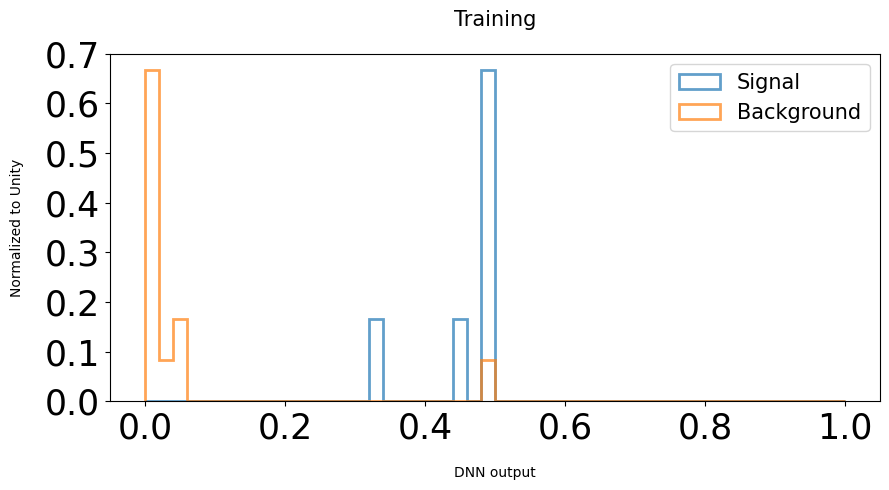

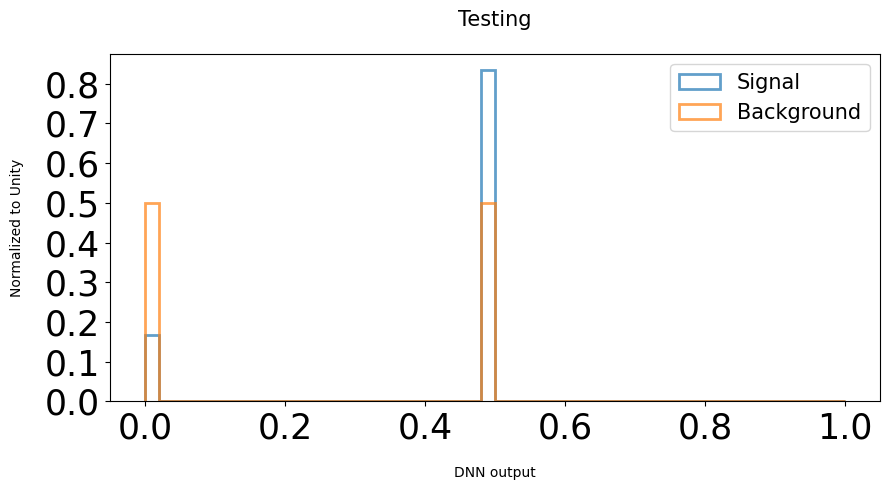

In [54]:
# Histogram for training data
wei20 = np.ones_like(sig_training) / float(len(sig_training))
wei21 = np.ones_like(back_training) / float(len(back_training))

fig, ax = plt.subplots(figsize=(9,5))
ax.hist(sig_training, weights=wei20, bins=50, range=(0, 1), histtype='step', linewidth=2, alpha=0.7, label='Signal')
ax.hist(back_training, weights=wei21, bins=50, range=(0, 1), histtype='step', linewidth=2, alpha=0.7, label='Background')
plt.ylabel('Normalized to Unity', fontsize=10, labelpad=15)
plt.xlabel('DNN output', fontsize=10, labelpad=15)
plt.title('Training', fontsize=15, pad=20)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.legend(fontsize=15)
plt.tight_layout()
plt.show()

# Histogram for test data
wei20t = np.ones_like(sig_testing) / float(len(sig_testing))
wei21t = np.ones_like(back_testing) / float(len(back_testing))

fig, ax = plt.subplots(figsize=(9,5))
ax.hist(sig_testing, weights=wei20t, range=(0,1), bins=50, histtype='step', linewidth=2, alpha=0.7, label='Signal')
ax.hist(back_testing, weights=wei21t, range=(0,1), bins=50, histtype='step', linewidth=2, alpha=0.7, label='Background')
plt.ylabel('Normalized to Unity', fontsize=10, labelpad=15)
plt.xlabel('DNN output', fontsize=10, labelpad=15)
plt.title('Testing', fontsize=15, pad=20)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.legend(fontsize=15)
plt.tight_layout()
plt.show()


Plotting ROC Curves for Training and Test Data

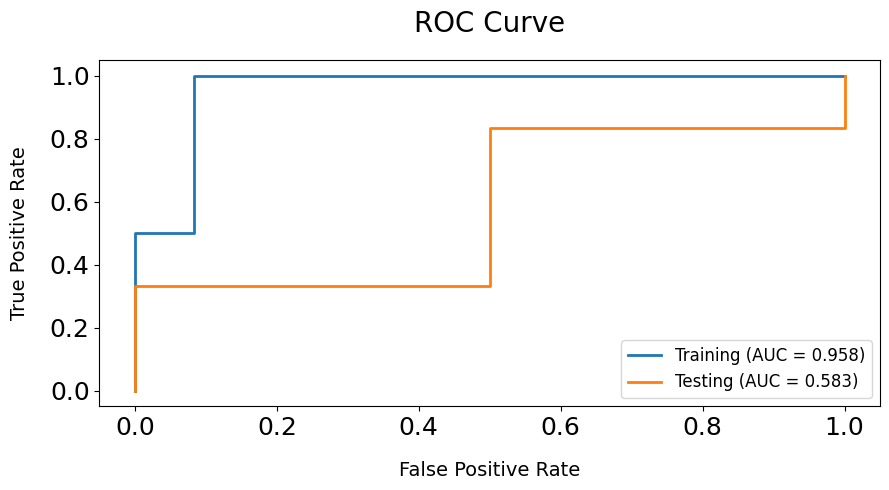

In [55]:
# Compute ROC curves
fpr_Test, tpr_Test, threshold = roc_curve(Y_test, pred_test)
fpr_Train, tpr_Train, threshold = roc_curve(Y_train, pred_train)

# Compute AUC
auc_keras_Test = auc(fpr_Test, tpr_Test)
auc_keras_Train = auc(fpr_Train, tpr_Train)

# Plot ROC curves
fig, ax = plt.subplots(figsize=(9,5))
ax.plot(fpr_Train, tpr_Train, linewidth=2, label=f'Training (AUC = {auc_keras_Train:.3f})')
ax.plot(fpr_Test, tpr_Test, linewidth=2, label=f'Testing (AUC = {auc_keras_Test:.3f})')
plt.ylabel('True Positive Rate', fontsize=14, labelpad=15)
plt.xlabel('False Positive Rate', fontsize=14, labelpad=15)
plt.title('ROC Curve', fontsize=20, pad=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


# New section